# Imports

In [1]:
%load_ext autoreload
%autoreload all
from helper import *
import os

2023-04-25 02:04:53.085814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 02:04:53.137113: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 02:04:53.138182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 02:04:54.111667: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data

In [2]:
root_dir = os.path.dirname(os.path.abspath('EPF_ABA23'))
data_path = os.path.join(root_dir,'dataset_management','data','clean')
df_clean = pd.read_csv(data_path + '/' +'clean.csv', index_col=0, parse_dates=['Timestamp'])
df_lag =  pd.read_csv(data_path + '/' +'clean_lagged.csv', index_col=0, parse_dates=['Timestamp'])

In [3]:
df_clean.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_[MW]',
       'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total'],
      dtype='object')

In [4]:
df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_[MW]',
       'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'],
      dtype='object')

In [5]:
old = ['Solar_[MW]','Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]']
new = ['Solar_MW','Biomass_Actual_Aggregated_MW','Waste_Actual_Aggregated_MW']

In [6]:
df_lag.rename(columns=dict(zip(old,new)), inplace = True)

In [7]:
df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_MW',
       'ttf_price', 'coal_price', 'co2_price', 'Biomass_Actual_Aggregated_MW',
       'Waste_Actual_Aggregated_MW', 'DE_LU_AT_imports', 'DE_LU_AT_exports',
       'Year', 'Quarter', 'Month', 'Date', 'Day', 'Weekday', 'Hour', 'Week',
       'business', 'Wind Total', 'DAP-lag24', 'DAP-lag36', 'DAP-lag48',
       'DAP-lag72', 'DAP-lag168', 'DAP-lag-168'],
      dtype='object')

In [8]:
df_lag.isna().sum()

DK_1_imports                      0
SE_4_imports                      0
DK_1_exports                      0
SE_4_exports                      0
Day_Ahead_price                   0
Forecasted_Load                   0
Actual_Load                       0
Solar_MW                          0
ttf_price                         0
coal_price                        0
co2_price                         0
Biomass_Actual_Aggregated_MW      0
Waste_Actual_Aggregated_MW        0
DE_LU_AT_imports                  0
DE_LU_AT_exports                  0
Year                              0
Quarter                           0
Month                             0
Date                              0
Day                               0
Weekday                           0
Hour                              0
Week                              0
business                          0
Wind Total                        0
DAP-lag24                        24
DAP-lag36                        36
DAP-lag48                   

In [9]:
df_lag.head()

,DK_1_imports,SE_4_imports,DK_1_exports,SE_4_exports,Day_Ahead_price,Forecasted_Load,Actual_Load,Solar_MW,ttf_price,coal_price,...,Hour,Week,business,Wind Total,DAP-lag24,DAP-lag36,DAP-lag48,DAP-lag72,DAP-lag168,DAP-lag-168
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,383.0,0.0,0.0,808.0,18.12,1258.0,1245.0,0.0,19.32,102.65,...,0,1,True,429.0,NaN,NaN,NaN,NaN,NaN,27.17
2018-01-02 01:00:00,589.0,0.0,0.0,1019.0,14.99,1188.0,1203.0,0.0,19.32,102.65,...,1,1,True,375.0,NaN,NaN,NaN,NaN,NaN,22.10
2018-01-02 02:00:00,557.0,0.0,0.0,926.0,17.79,1167.0,1178.0,0.0,19.32,102.65,...,2,1,True,313.0,NaN,NaN,NaN,NaN,NaN,9.79
2018-01-02 03:00:00,487.0,0.0,0.0,784.0,24.51,1187.0,1180.0,0.0,19.32,102.65,...,3,1,True,229.0,NaN,NaN,NaN,NaN,NaN,4.99
2018-01-02 04:00:00,580.0,0.0,0.0,756.0,17.82,1235.0,1247.0,0.0,19.32,102.65,...,4,1,True,175.0,NaN,NaN,NaN,NaN,NaN,9.24


# Models

In [10]:
# setting up features and target
cols_std = ['DK_1_imports', 'SE_4_imports', 'DK_1_exports',
            'SE_4_exports', 'Forecasted_Load', 'Actual_Load',
        #   'Solar_MW', 'ttf_price', 'coal_price', 'co2_price',
            'Biomass_Actual_Aggregated_MW', 'Waste_Actual_Aggregated_MW',
            'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Wind Total',
            'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
            'DAP-lag-168'] 

features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']
target = 'Day_Ahead_price'

In [11]:
# setting up splits
train_start = pd.to_datetime(['2018-01-01', '2021-01-01', '2021-07-01'], format = '%Y-%m-%d')
# train_start = pd.to_datetime(['2018-01-01', '2019-06-01', '2020-08-01', '2021-10-01', '2022-12-01'], format = '%Y-%m-%d')
k_folds = len(train_start)

df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_MW',
       'ttf_price', 'coal_price', 'co2_price', 'Biomass_Actual_Aggregated_MW',
       'Waste_Actual_Aggregated_MW', 'DE_LU_AT_imports', 'DE_LU_AT_exports',
       'Year', 'Quarter', 'Month', 'Date', 'Day', 'Weekday', 'Hour', 'Week',
       'business', 'Wind Total', 'DAP-lag24', 'DAP-lag36', 'DAP-lag48',
       'DAP-lag72', 'DAP-lag168', 'DAP-lag-168'],
      dtype='object')

In [12]:
k_folds

3

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [13]:
split_method = 0

### Baseline

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00


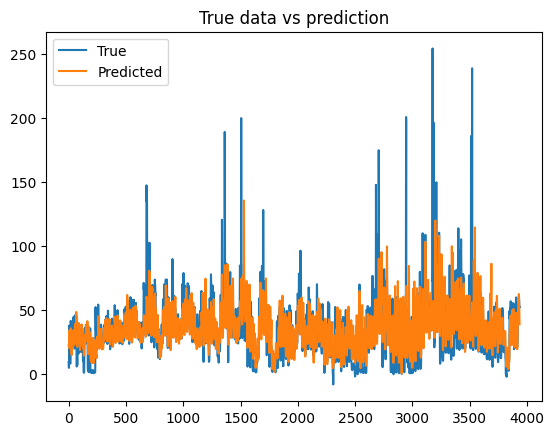

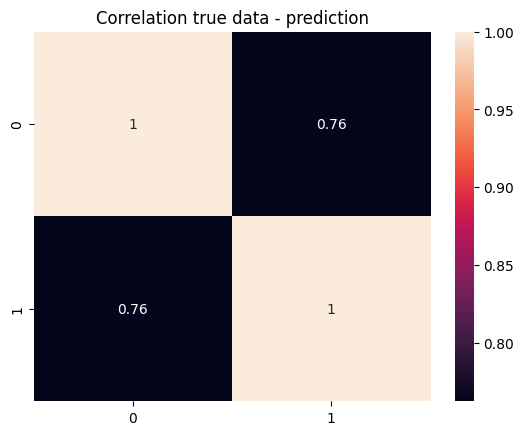

	r^2=0.570926
Mean Absolute Error (MAE): 9.776969547122665
Mean Squared Error (MSE): 232.7869615596402
Root Mean Squared Error (RMSE): 15.2573576204938
Mean Absolute Percentage Error (MAPE): 127.14
Accuracy: -27.14
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00


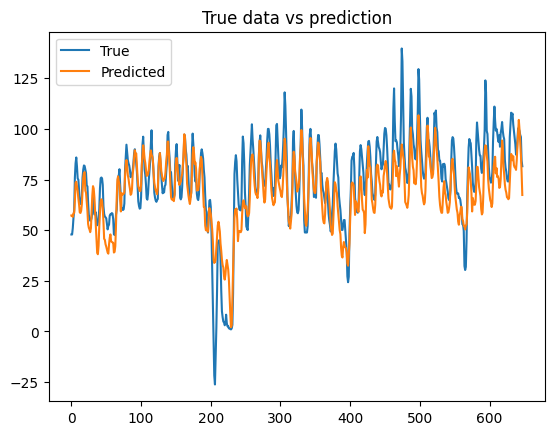

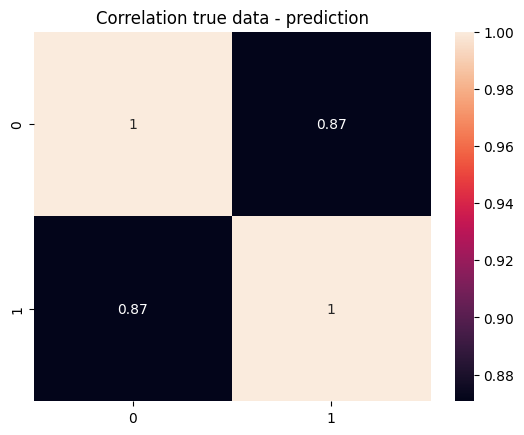

	r^2=0.663238
Mean Absolute Error (MAE): 10.30754261538721
Mean Squared Error (MSE): 165.01143096662216
Root Mean Squared Error (RMSE): 12.845677520731329
Mean Absolute Percentage Error (MAPE): 36.85
Accuracy: 63.15
Iteration  2
train 2021-07-01 00:00:00 - 2023-01-01 23:00:00, test 2023-01-02 00:00:00 - 2023-04-08 23:00:00


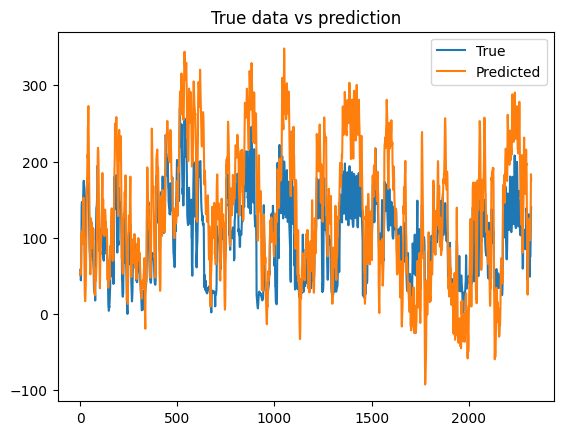

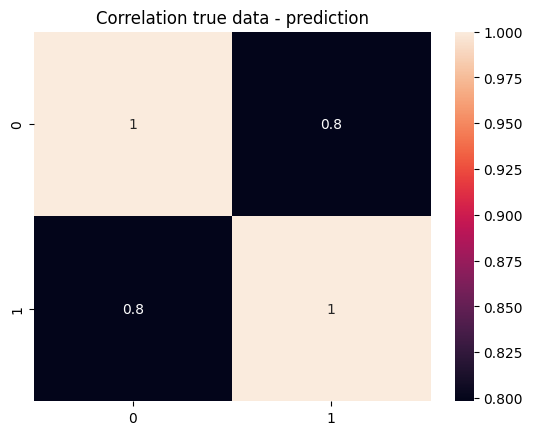

	r^2=-0.654549
Mean Absolute Error (MAE): 54.43110763155927
Mean Squared Error (MSE): 4386.584324681056
Root Mean Squared Error (RMSE): 66.23129414922417
Mean Absolute Percentage Error (MAPE): 96.39
Accuracy: 3.61


In [35]:
lr_pred_0, lr_model_0 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

### Random Forest

In [50]:
rf_pred_0, rf_models_0 = run_model('rf', df_lag, k_folds, split_method, train_start, features, target, cols_std)

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00


KeyboardInterrupt: 

### XGBoost

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00


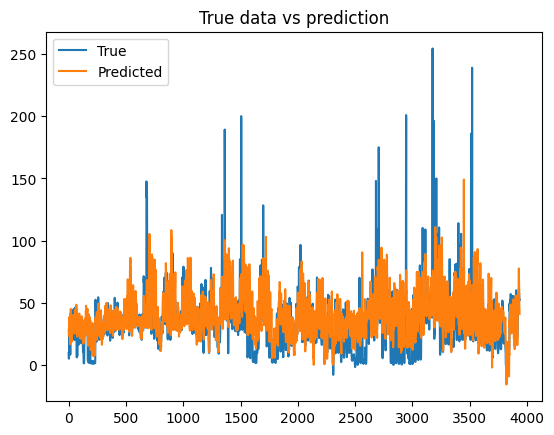

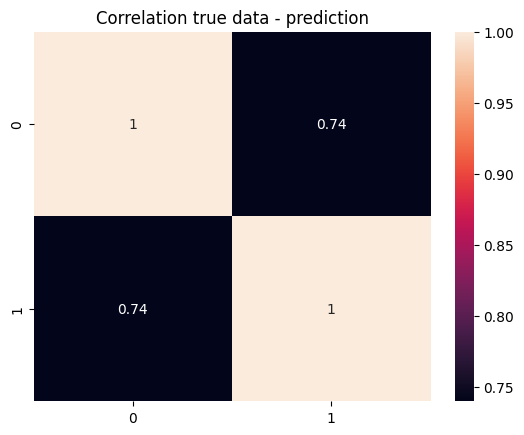

	r^2=0.510789
Mean Absolute Error (MAE): 10.971637993013465
Mean Squared Error (MSE): 265.41321806974383
Root Mean Squared Error (RMSE): 16.2915075444154
Mean Absolute Percentage Error (MAPE): 191.99
Accuracy: -91.99
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00


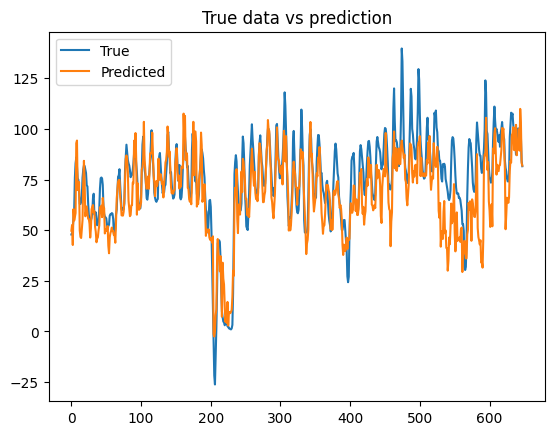

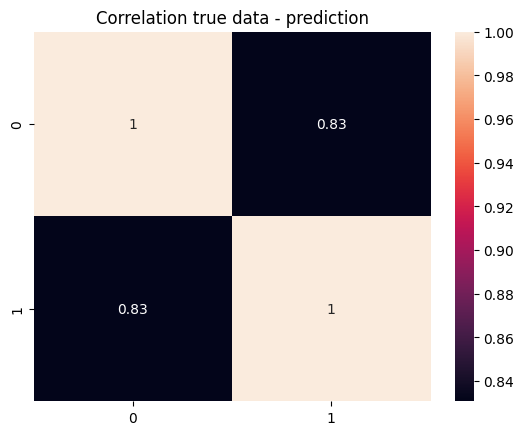

	r^2=0.573528
Mean Absolute Error (MAE): 10.9066031791141
Mean Squared Error (MSE): 208.9686269987028
Root Mean Squared Error (RMSE): 14.45574719613977
Mean Absolute Percentage Error (MAPE): 24.6
Accuracy: 75.4
Iteration  2
train 2021-07-01 00:00:00 - 2022-12-31 23:00:00, test 2023-01-01 00:00:00 - 2023-04-07 23:00:00


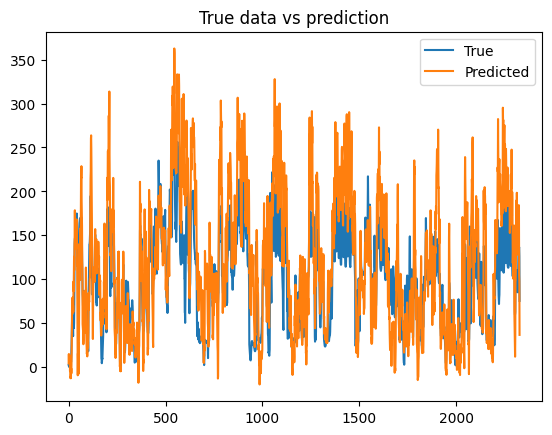

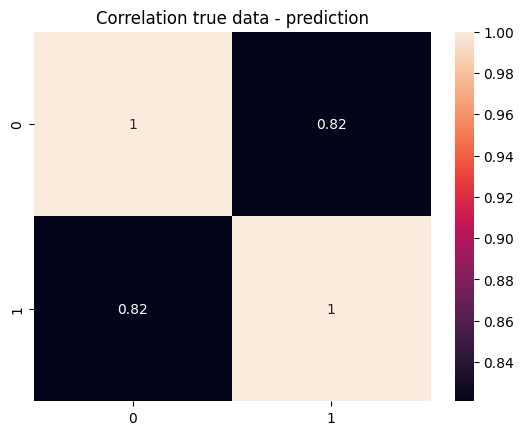

	r^2=0.072235
Mean Absolute Error (MAE): 39.14815342717484
Mean Squared Error (MSE): 2512.1272599089575
Root Mean Squared Error (RMSE): 50.121125884291125
Mean Absolute Percentage Error (MAPE): 84.78
Accuracy: 15.22


In [20]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lag, k_folds, split_method, train_start, features, target, cols_std,'short_term')

### Gradient Boost

In [21]:
gb_0 = run_model('gb', df_lag, k_folds, split_method, train_start, features, target, cols_std)

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00


### LSTM

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00
Epoch 1/10


2023-04-25 01:21:31.095243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:21:31.096728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:21:31.097863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

555/555 [==============================] - ETA: 0s - loss: 690.8558

2023-04-25 01:21:40.376852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:21:40.378450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:21:40.379523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

555/555 [==============================] - 10s 14ms/step - loss: 690.8558 - val_loss: 382.0851
Epoch 2/10
555/555 [==============================] - 7s 13ms/step - loss: 220.0538 - val_loss: 178.4162
Epoch 3/10
555/555 [==============================] - 7s 13ms/step - loss: 141.7953 - val_loss: 154.2479
Epoch 4/10
555/555 [==============================] - 8s 14ms/step - loss: 116.3600 - val_loss: 258.4240
Epoch 5/10
555/555 [==============================] - 8s 14ms/step - loss: 103.3460 - val_loss: 204.2491
Epoch 6/10
555/555 [==============================] - 7s 13ms/step - loss: 94.2891 - val_loss: 174.3394
Epoch 7/10
555/555 [==============================] - 7s 13ms/step - loss: 88.0250 - val_loss: 141.5952
Epoch 8/10
555/555 [==============================] - 7s 13ms/step - loss: 83.1985 - val_loss: 135.9331
Epoch 9/10
555/555 [==============================] - 8s 14ms/step - loss: 78.8905 - val_loss: 121.8328
Epoch 10/10
 14/124 [==>...........................] - ETA: 0s 

2023-04-25 01:22:48.962392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:22:48.963904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:22:48.965110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

124/124 [==============================] - 1s 5ms/step
(3937, 1)


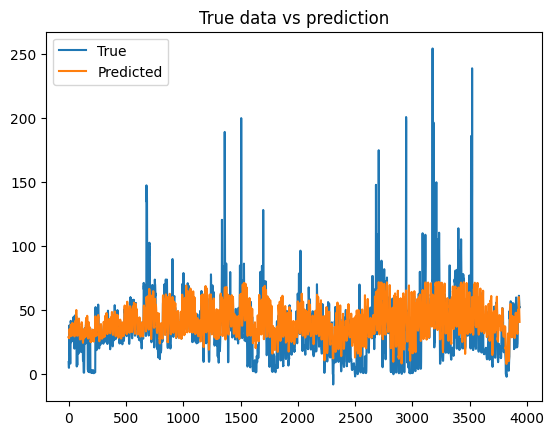

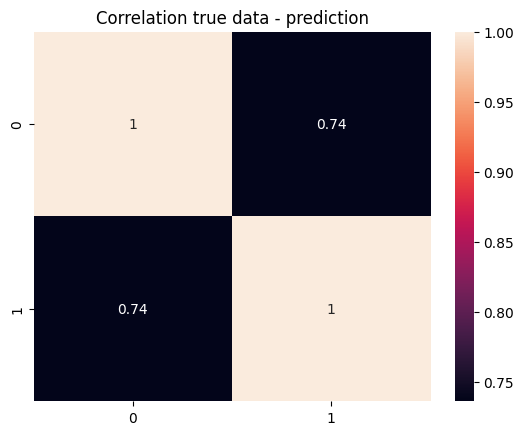

	r^2=0.431692
Mean Absolute Error (MAE): 12.26351429190093
Mean Squared Error (MSE): 308.32603530728346
Root Mean Squared Error (RMSE): 17.55921511079819
Mean Absolute Percentage Error (MAPE): 208.87
Accuracy: -108.87
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00
Epoch 1/10


2023-04-25 01:22:50.451531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:22:50.452815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:22:50.454144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

90/93 [============================>.] - ETA: 0s - loss: 2238.3298

2023-04-25 01:22:53.703456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:22:53.704864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:22:53.705868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

93/93 [==============================] - 3s 15ms/step - loss: 2231.6914 - val_loss: 2147.3257
Epoch 2/10
93/93 [==============================] - 1s 12ms/step - loss: 1448.1202 - val_loss: 1653.8854
Epoch 3/10
93/93 [==============================] - 1s 12ms/step - loss: 1115.4352 - val_loss: 1318.1613
Epoch 4/10
93/93 [==============================] - 1s 13ms/step - loss: 887.5906 - val_loss: 1072.7722
Epoch 5/10
93/93 [==============================] - 1s 12ms/step - loss: 730.0029 - val_loss: 898.1956
Epoch 6/10
93/93 [==============================] - 1s 12ms/step - loss: 624.2017 - val_loss: 771.9167
Epoch 7/10
93/93 [==============================] - 1s 11ms/step - loss: 555.8407 - val_loss: 686.6274
Epoch 8/10
93/93 [==============================] - 1s 13ms/step - loss: 513.4052 - val_loss: 625.7275
Epoch 9/10
93/93 [==============================] - 1s 13ms/step - loss: 488.3247 - val_loss: 586.3192
Epoch 10/10
15/21 [====================>.........] - ETA: 0s

2023-04-25 01:23:04.438825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:23:04.440312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:23:04.441486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 0s 4ms/step
(648, 1)


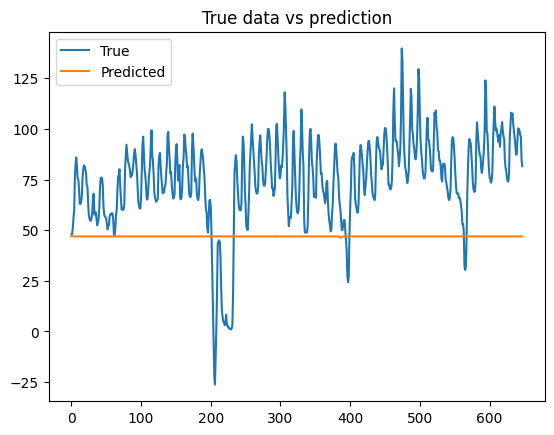

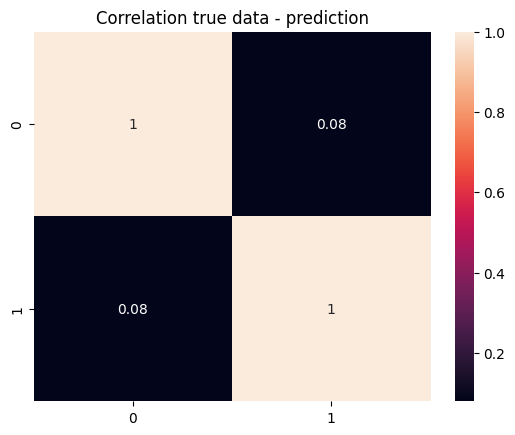

	r^2=-1.586127
Mean Absolute Error (MAE): 31.766017183374476
Mean Squared Error (MSE): 1267.1872306104124
Root Mean Squared Error (RMSE): 35.597573380926015
Mean Absolute Percentage Error (MAPE): 92.72
Accuracy: 7.28
Iteration  2
train 2021-07-01 00:00:00 - 2023-01-01 23:00:00, test 2023-01-02 00:00:00 - 2023-04-08 23:00:00
Epoch 1/10


2023-04-25 01:23:05.308650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:23:05.310171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:23:05.311403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

329/330 [============================>.] - ETA: 0s - loss: 43675.6250

2023-04-25 01:23:11.068141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:23:11.071004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:23:11.073174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

330/330 [==============================] - 6s 14ms/step - loss: 43678.2539 - val_loss: 46190.4258
Epoch 2/10
330/330 [==============================] - 4s 12ms/step - loss: 36992.8438 - val_loss: 40026.8047
Epoch 3/10
330/330 [==============================] - 4s 12ms/step - loss: 32230.7559 - val_loss: 35120.6953
Epoch 4/10
330/330 [==============================] - 4s 12ms/step - loss: 28505.1934 - val_loss: 31199.8887
Epoch 5/10
330/330 [==============================] - 4s 13ms/step - loss: 25615.0742 - val_loss: 28079.1934
Epoch 6/10
330/330 [==============================] - 5s 14ms/step - loss: 23403.7305 - val_loss: 25661.9785
Epoch 7/10
330/330 [==============================] - 4s 12ms/step - loss: 21713.2812 - val_loss: 23766.5742
Epoch 8/10
330/330 [==============================] - 4s 13ms/step - loss: 20585.9727 - val_loss: 22401.7852
Epoch 9/10
330/330 [==============================] - 4s 12ms/step - loss: 19860.6504 - val_loss: 21424.5156
Epoch 10/10
13/73 [====>......

2023-04-25 01:23:49.317404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 01:23:49.319003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 01:23:49.320158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

73/73 [==============================] - 1s 4ms/step
(2323, 1)


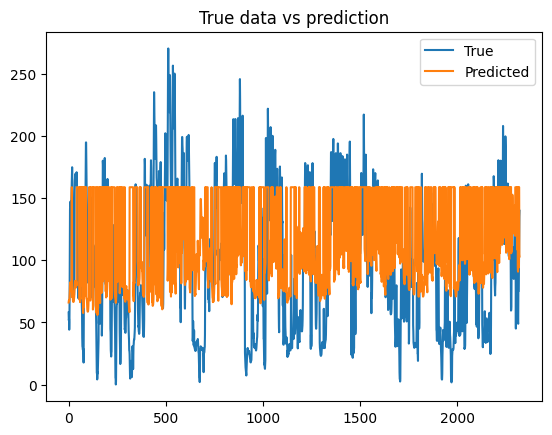

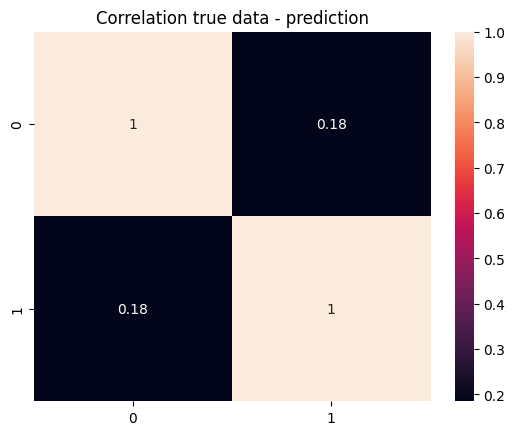

	r^2=-0.405416
Mean Absolute Error (MAE): 49.022233365568376
Mean Squared Error (MSE): 3726.0775998006125
Root Mean Squared Error (RMSE): 61.04160548184011
Mean Absolute Percentage Error (MAPE): 157.97
Accuracy: -57.97


In [39]:
lstm_0 = run_model('lstm', df_lag, k_folds, split_method, train_start, features, target, cols_std)

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [ ]:
split_method = 1

### Baseline

In [ ]:
lr_pred_1, lr_model_1 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

### Random forest

In [ ]:
rf_pred_1, rf_models_1 = run_model('rf', df_lag, k_folds, split_method, train_start, features, target, cols_std, 'short_term')

### XGBoost

In [ ]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### Gradient Boost

### LSTM

In [ ]:
lstm_1 = run_model('lstm', df_lag, k_folds, split_method, train_start, features, target, cols_std)

#### NOTES FRANCISCO/FREDERIK 14/04<br>
correlation between ytrue and ypred, RMSE can be hard to refrence.<br>
use power transform instead of log (how?)